In [5]:
# add chempe
import sys
sys.path.append('../..')

In [6]:
from chempe.data.lef_uspto import LEF_USPTO, DataVariants
from chempe.data.transforms import TransformStrToBrokenDownParts, TransformToRdKitIntermediates

In [7]:
test_data = LEF_USPTO(DataVariants.TEST, transforms=[TransformStrToBrokenDownParts(), TransformToRdKitIntermediates()])

In [8]:
import os
import numpy as np

In [9]:
# select n test prompts
n = 20
test_indices = np.load("../../data/test_indices.npy", allow_pickle=True)[:n]

In [11]:
data = test_data[test_indices]

/Users/johnlee/Documents/Projects/ChemistryPE/scripts/data_exploration/../../chempe/data/rdkit_ops/rdkit_reaction_ops.py:173: UserWarning: We potentially are having changes in kekulization.
  warnings.warn("We potentially are having changes in kekulization.")


In [21]:
from ipywidgets import interact, fixed

In [63]:
print(help(data[0]))

Help on RdKitIntermediates in module chempe.data.transforms object:

class RdKitIntermediates(builtins.tuple)
 |  RdKitIntermediates(broken_down_parts: chempe.data.transforms.BrokenDownParts, intermediates: List[rdkit.Chem.rdchem.Mol], reagents: rdkit.Chem.rdchem.Mol, ordered_indx_path: List[int], am_to_idx_map: Mapping[int, int])
 |  
 |  RdKitIntermediates(broken_down_parts, intermediates, reagents, ordered_indx_path, am_to_idx_map)
 |  
 |  Method resolution order:
 |      RdKitIntermediates
 |      builtins.tuple
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __getnewargs__(self)
 |      Return self as a plain tuple.  Used by copy and pickle.
 |  
 |  __repr__(self)
 |      Return a nicely formatted representation string
 |  
 |  _asdict(self)
 |      Return a new dict which maps field names to their values.
 |  
 |  _replace(self, /, **kwds)
 |      Return a new RdKitIntermediates object replacing specified fields with new values
 |  
 |  -------------------------

In [67]:
for i in range(n):
    print(len(data[i].intermediates))
    print(data[i].ordered_indx_path)
    print(data[i].am_to_idx_map)

5
[10, 10, 0, 3]
{1: 0, 2: 1, 3: 2, 4: 3, 5: 4, 6: 5, 7: 6, 13: 7, 19: 8, 20: 9, 21: 10, 22: 11, 23: 12, 24: 13, 25: 14, 14: 15, 15: 16, 16: 17, 17: 18, 18: 19}
5
[16, 15, 6, 8]
{1: 0, 15: 1, 2: 2, 3: 3, 10: 4, 11: 5, 12: 6, 13: 7, 14: 8, 4: 9, 7: 10, 8: 11, 9: 12, 5: 13, 6: 14, 16: 15, 17: 16, 18: 17, 19: 18, 20: 19, 21: 20}
3
[9, 10]
{1: 0, 2: 1, 30: 2, 3: 3, 4: 4, 12: 5, 13: 6, 29: 7, 14: 8, 23: 9, 24: 10, 25: 11, 26: 12, 27: 13, 28: 14, 15: 15, 16: 16, 17: 17, 18: 18, 19: 19, 20: 20, 21: 21, 22: 22, 5: 23, 6: 24, 7: 25, 8: 26, 9: 27, 10: 28, 11: 29}
5
[8, 7, 1, 0]
{1: 0, 2: 1, 3: 2, 4: 3, 5: 4, 6: 5, 7: 6, 8: 7, 12: 8, 13: 9, 14: 10, 9: 11, 10: 12, 11: 13}
5
[9, 9, 53, 54]
{1: 0, 2: 1, 3: 2, 4: 3, 5: 4, 6: 5, 7: 6, 8: 7, 9: 8, 10: 9, 52: 10, 53: 11, 11: 12, 12: 13, 31: 14, 32: 15, 33: 16, 34: 17, 35: 18, 40: 19, 41: 20, 42: 21, 51: 22, 43: 23, 50: 24, 44: 25, 47: 26, 48: 27, 49: 28, 45: 29, 46: 30, 36: 31, 39: 32, 37: 33, 38: 34, 13: 35, 23: 36, 24: 37, 25: 38, 26: 39, 27: 40, 28: 

In [94]:
def print_parts(i, file):
    with open(file, 'w') as f:
        f.write(data[i].broken_down_parts.reactants + '\n')
        for intermediate in data[i].intermediates[1:]:
            f.write(intermediate + '\n')
        f.write(data[i].broken_down_parts.products + '\n')
        for j in data[i].ordered_indx_path:
            f.write(f'{j} ')
        
    

In [95]:
for i in range(20):
    print_parts(i, f"data/{i}.txt")

In [29]:
def check_step1_change(i):
    if data[i].broken_down_parts.reactants == data[i].intermediates[1]:
        return False
    return True


In [36]:
changes = {i:check_step1_change(i) for i in range(20)}
changes

{0: False,
 1: False,
 2: True,
 3: True,
 4: False,
 5: False,
 6: True,
 7: False,
 8: False,
 9: False,
 10: False,
 11: False,
 12: False,
 13: False,
 14: False,
 15: True,
 16: False,
 17: True,
 18: False,
 19: False}

In [42]:
from collections import Counter
def check_step1_let_change(i):
    x = Counter(data[i].broken_down_parts.reactants)
    y = Counter(data[i].intermediates[1])
    return x == y

In [43]:
total_item_change = {i:check_step1_let_change(i) for i in range(n)}
total_item_change

{0: True,
 1: True,
 2: True,
 3: True,
 4: True,
 5: True,
 6: True,
 7: True,
 8: True,
 9: True,
 10: True,
 11: True,
 12: True,
 13: True,
 14: True,
 15: True,
 16: True,
 17: True,
 18: True,
 19: True}

In [57]:
def check_step2_change(i):
    x = Counter(data[i].intermediates[1])
    y = Counter(data[i].intermediates[2])
    diff = set()
    for j in x:
        if x[j] != y[j]:
            diff.add(j)
    for j in y:
        if x[j] != y[j]:
            diff.add(j)
    return(diff)

In [58]:
{i:check_step2_change(i) for i in range(n)}

{0: {'+'},
 1: {'.'},
 2: {'='},
 3: {'(', ')', '.'},
 4: {'+'},
 5: {'+'},
 6: {'+'},
 7: {'+'},
 8: {'.'},
 9: {'+'},
 10: {'+'},
 11: {'.', '1', '3'},
 12: {'+'},
 13: {'.'},
 14: {'+'},
 15: {'(', ')', '.'},
 16: {'+'},
 17: {'+'},
 18: {'+'},
 19: {'+'}}

In [93]:
data[0]

RdKitIntermediates(broken_down_parts=BrokenDownParts(reactants='[CH:1]([CH3:2])([CH3:3])[NH:4][CH:5]([CH3:6])[CH3:7].[c:13]1([C:19](=[CH:20][CH2:21][C:22](=[O:23])[OH:24])[CH3:25])[cH:14][cH:15][cH:16][cH:17][cH:18]1', reagents='[CH2:30]1[O:31][CH2:32][CH2:33][CH2:34]1.[CH2:8]([Li:9])[CH2:10][CH2:11][CH3:12].[CH3:35][CH2:36][CH2:37][CH2:38][CH2:39][CH3:40].[CH:26]([I:27])([CH3:28])[CH3:29].[OH2:41]', products='[CH:1]([CH3:2])([CH3:3])[CH:21]([CH:20]=[C:19]([c:13]1[cH:14][cH:15][cH:16][cH:17][cH:18]1)[CH3:25])[C:22](=[O:23])[OH:24]', ordered_am_path=[21, 21, 1, 4]), intermediates=['[CH:1]([CH3:2])([CH3:3])[NH:4][CH:5]([CH3:6])[CH3:7].[c:13]1([C:19](=[CH:20][CH2:21][C:22](=[O:23])[OH:24])[CH3:25])[cH:14][cH:15][cH:16][cH:17][cH:18]1', '[CH:1]([CH3:2])([CH3:3])[NH:4][CH:5]([CH3:6])[CH3:7].[c:13]1([C:19](=[CH:20][CH2:21][C:22](=[O:23])[OH:24])[CH3:25])[cH:14][cH:15][cH:16][cH:17][cH:18]1', '[CH:1]([CH3:2])([CH3:3])[NH:4][CH:5]([CH3:6])[CH3:7].[c:13]1([C:19](=[CH:20][CH2+:21][C:22](=[O:23])

In [68]:
{data[i]. for i in rn}

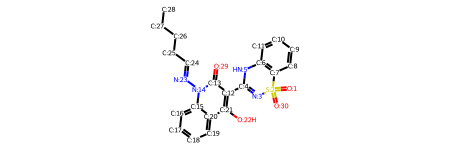

In [85]:
x = rdkit.Chem.MolFromSmiles("[O:1]=[S:2]1(=[O:30])[N:3]=[C:4]([c:12]2[c:13](=[O:29])[n:14]([N:23]=[CH:24][CH2:25][CH2:26][CH2:27][CH3:28])[c:15]3[cH:16][cH:17][cH:18][cH:19][c:20]3[c:21]2[OH:22])[NH:5][c:6]2[c:7]1[cH:8][cH:9][cH:10][cH:11]2")
x

In [86]:
rdkit.Chem.Kekulize(x)

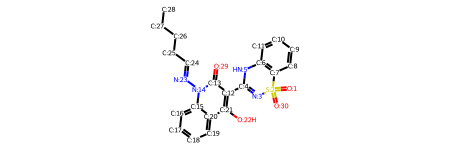

In [87]:
x

In [89]:
rdkit.Chem.MolToSmiles(x) == "[O:1]=[S:2]1(=[O:30])[N:3]=[C:4]([c:12]2[c:13](=[O:29])[n:14]([N:23]=[CH:24][CH2:25][CH2:26][CH2:27][CH3:28])[c:15]3[cH:16][cH:17][cH:18][cH:19][c:20]3[c:21]2[OH:22])[NH:5][c:6]2[c:7]1[cH:8][cH:9][cH:10][cH:11]2"

False

In [90]:
rdkit.Chem.CanonSmiles("[O:1]=[S:2]1(=[O:30])[N:3]=[C:4]([c:12]2[c:13](=[O:29])[n:14]([N:23]=[CH:24][CH2:25][CH2:26][CH2:27][CH3:28])[c:15]3[cH:16][cH:17][cH:18][cH:19][c:20]3[c:21]2[OH:22])[NH:5][c:6]2[c:7]1[cH:8][cH:9][cH:10][cH:11]2") == "[O:1]=[S:2]1(=[O:30])[N:3]=[C:4]([c:12]2[c:13](=[O:29])[n:14]([N:23]=[CH:24][CH2:25][CH2:26][CH2:27][CH3:28])[c:15]3[cH:16][cH:17][cH:18][cH:19][c:20]3[c:21]2[OH:22])[NH:5][c:6]2[c:7]1[cH:8][cH:9][cH:10][cH:11]2"

True